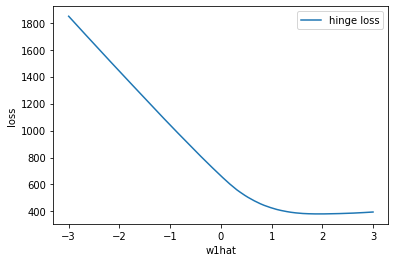

In [33]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv
import itertools

class Hinge_loss_function:
    def __init__(self):
        self.n = 200
        self.lam = 0.01
        self.x = 3 * (np.random.randn(self.n, 4) - 0.5)
        self.y = (2 * self.x[:,0] - 1 * self.x[:,1] + 0.5 + 0.5 * np.random.randn(self.n, 1)) > 0 
        self.y = 2 * self.y - 1
        self.w = np.arange(-3, 3, 0.002)
        self.hingelss = np.zeros(len(self.w))
    
    def main(self):
        for i in range (len(self.w)):
            reg         = lam * self.w[i]
            ywx         = self.y * self.w[i] * self.x[:, 0] + self.x[:, 1]
            self.hingelss[i] = 1.0 / self.n * np.sum(np.maximum(np.zeros(len(self.y)), 1 - ywx)) + reg
            
    def DrowGraph(self):
        plt.plot(self.w, self.hingelss, label='hinge loss')
        plt.legend()
        plt.xlabel('w1hat')
        plt.ylabel('loss')
        
hlf = Hinge_loss_function()
hlf.main()
hlf.DrowGraph()

In [46]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv
import itertools

class Hinge_loss_function:
    def __init__(self):
        self.n = 200
        self.lam = 0.01
        self.x = 3 * (np.random.randn(self.n, 4) - 0.5)
        self.y = (2 * self.x[:,0] - 1 * self.x[:,1] + 0.5 + 0.5 * np.random.randn(self.n, 1)) > 0 
        self.y = 2 * self.y - 1
        self.w = np.arange(-3, 3, 0.002)
        self.Value = np.zeros(len(self.w))
        self.hingelss = np.zeros(len(self.w))
        
    def calc_eval_fun(self):       
        # 評価関数値の計算
        for i in range(len(self.w)):
                reg = self.lam * self.w[i]
                ywx = self.y * self.w[i] * self.x[:, 0] + self.x[:, 1]
                self.Value[i] = 1.0 / self.n * np.sum(np.maximum(np.zeros(len(self.y)), 1 - ywx)) + reg
    
    def ops(self, mu, q):
        x_proj = np.zeros(mu.shape)
        for i in range(len(mu)):
            if mu[i] > q:
                x_proj[i] = mu[i] - q
            else:
                if np.abs(mu[i]) < q:
                    x_proj[i] = 0
                else:
                    x_proj[i] = mu[i] + q; 
                
        return x_proj
    
    def main(self):
        for i in range (len(self.w)):
            reg         = lam * self.w[i]
            ywx         = self.y * self.w[i] * self.x[:, 0] + self.x[:, 1]
            self.hingelss[i] = 1.0 / self.n * np.sum(np.maximum(np.zeros(len(self.y)), 1 - ywx)) + reg
            # cvx
            # 重み係数
            w_hinge = cv.Variable((1, 1))
            # 評価関数値
            J = 1.0 / self.n * np.sum(np.maximum(np.zeros(len(self.y)), 1 - ywx)) + reg
            # 評価関数の最小値
            objective = cv.Minimize(J)
            # 不等式制約
            constraints = [1 - ywx <= 0]
            prob = cv.Problem(objective, constraints)
            result = prob.solve()
            
            # 勾配
            grad = 1
            eta  = 0.5
            xth  = xt - eta * grad
            
    def DrowGraph(self):
        plt.plot(self.w, self.hingelss, label='hinge loss')
        plt.legend()
        plt.xlabel('w1hat')
        plt.ylabel('loss')
        
hlf = Hinge_loss_function()
hlf.calc_eval_fun()
hlf.main()
hlf.DrowGraph()

AttributeError: 'numpy.ndarray' object has no attribute 'parameters'